# #1. Make Graph with Pass Map

Game : 2015, May 21, Western Conference Final, Game 2 : HOU vs. GSW

Results : HOU 98 : 99 GSW

Full Game Video Link in NBA Channel : https://www.youtube.com/watch?v=2nn-umdCxXo

In [127]:
hou_player_dic = {1 : "Trevor Ariza", 5 : "Josh Smith", 12 : "Dwight Howard", 13 : "James Harden", 31 : "Jason Terry", 15 : "Clint Capela", 6 : "Terrence Jones", 9 : "Pablo Prigioni", 33 : "Corey Brewer", 3 : "Nick Johnson"}
gsw_player_dic = {40 : "Harrison Barnes", 23 : "Draymond Green", 12 : "Andrew Bogut", 11 : "Klay Thompson", 30 : "Stephen Curry", 9 : "Andre Iguodala", 19 : "Leandro Barbosa", 31 : "Festus Ezeli", 34 : "Shaun Livingston"}
print(len(hou_player_dic), len(gsw_player_dic))

10 9


In [134]:
#make adjacent matrix

hou_player_num = len(hou_player_dic)
gsw_player_num = len(gsw_player_dic)

hou_adj = [[0 for i in range(hou_player_num)] for j in range(hou_player_num)]
gsw_adj = [[0 for i in range(gsw_player_num)] for j in range(gsw_player_num)]

hou_txt = open('20150521_HOUGSW_HOU_PASS.txt', mode='rt', encoding='utf-8')
gsw_txt = open('20150521_HOUGSW_GSW_PASS.txt', mode='rt', encoding='utf-8')

In [136]:
for i in hou_txt.readlines():
    
    pl1, pl2 = [k for k in i.split(" ")]
    pl2 = pl2[:-1]
    pl1, pl2 = map(int, [pl1, pl2])
    
    pl_backnum_lst = list(hou_player_dic.keys())
    pl1_idx, pl2_idx = pl_backnum_lst.index(pl1), pl_backnum_lst.index(pl2)

    hou_adj[pl1_idx][pl2_idx] += 1
    hou_adj[pl2_idx][pl1_idx] += 1

for i in gsw_txt.readlines():
    
    pl1, pl2 = [k for k in i.split(" ")]
    pl2 = pl2[:-1]
    pl1, pl2 = map(int, [pl1, pl2])
    
    pl_backnum_lst = list(gsw_player_dic.keys())
    pl1_idx, pl2_idx = pl_backnum_lst.index(pl1), pl_backnum_lst.index(pl2)
    
    gsw_adj[pl1_idx][pl2_idx] += 1
    gsw_adj[pl2_idx][pl1_idx] += 1

for i in range(hou_player_num):
    for j in range(hou_player_num):
        print(hou_adj[i][j], end = " ")
    print()
    
print()

for i in range(gsw_player_num):
    for j in range(gsw_player_num):
        print(gsw_adj[i][j], end = " ")
    print()

0 9 7 19 9 3 2 3 0 0 
9 0 5 4 10 1 0 1 2 0 
7 5 0 14 12 0 4 2 4 0 
19 4 14 0 13 3 14 1 6 2 
9 10 12 13 0 1 4 0 1 0 
3 1 0 3 1 0 0 0 1 0 
2 0 4 14 4 0 0 1 3 2 
3 1 2 1 0 0 1 0 3 0 
0 2 4 6 1 1 3 3 0 0 
0 0 0 2 0 0 2 0 0 0 

0 5 1 5 4 4 2 0 2 
5 0 6 17 38 10 3 2 3 
1 6 0 8 8 2 5 0 2 
5 17 8 0 7 0 0 0 1 
4 38 8 7 0 4 5 1 2 
4 10 2 0 4 0 14 4 5 
2 3 5 0 5 14 0 1 3 
0 2 0 0 1 4 1 0 0 
2 3 2 1 2 5 3 0 0 


In [137]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

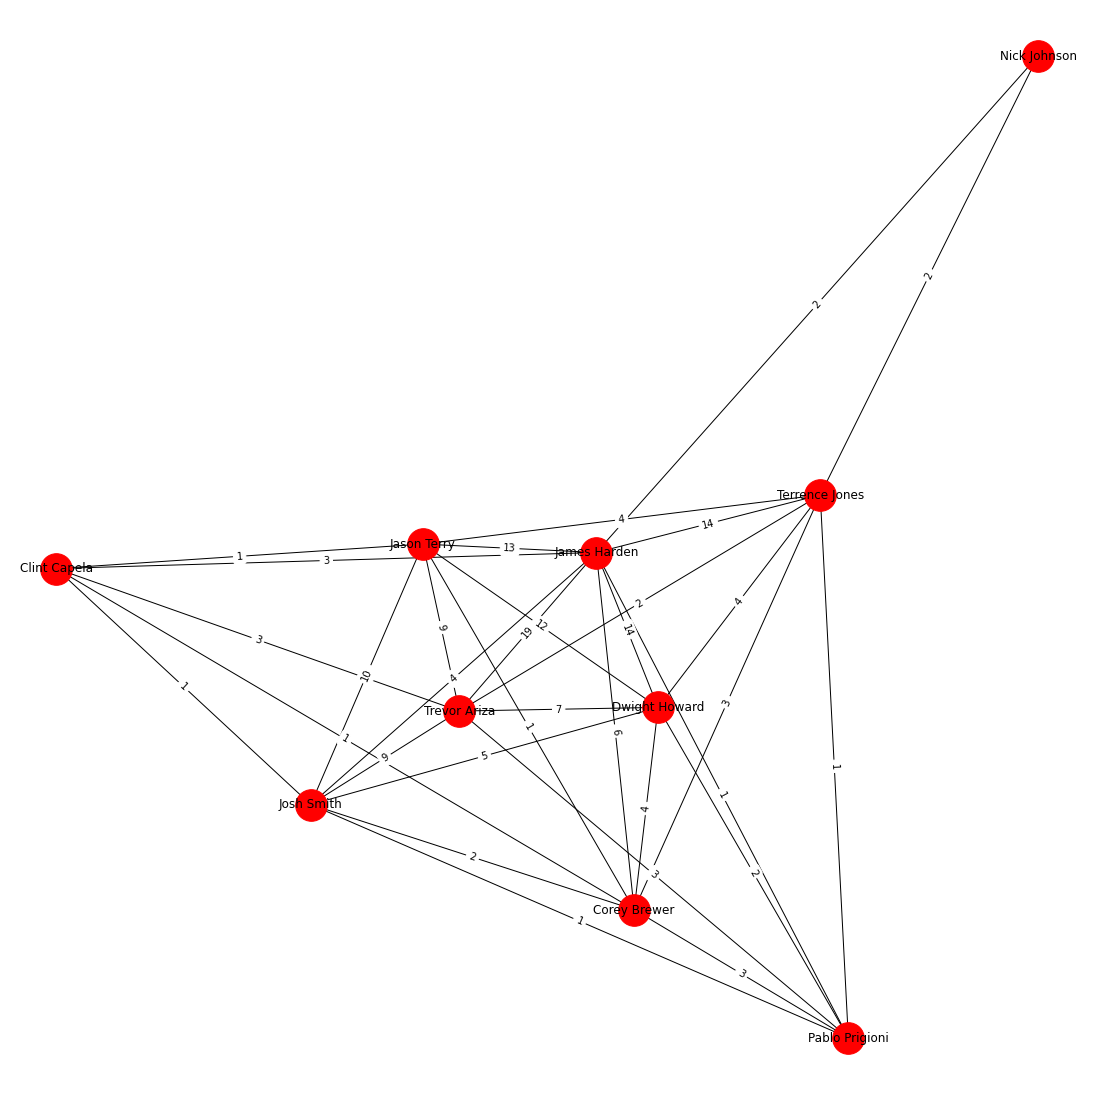

In [138]:
plt.figure(figsize=(15,15))
hou_graph = nx.Graph()
for i in hou_player_dic.values():
    hou_graph.add_node(i)

hou_backnum_lst = list(hou_player_dic.keys())

for i in range(hou_player_num):
    for j in range(hou_player_num):
            if(hou_adj[i][j]!=0):
                hou_graph.add_edge(hou_player_dic[hou_backnum_lst[i]], hou_player_dic[hou_backnum_lst[j]], weight=hou_adj[i][j])

pos=nx.spring_layout(hou_graph)

nx.draw(hou_graph, pos=pos, with_labels=True)

labels=nx.get_edge_attributes(hou_graph, 'weight')
nx.draw_networkx_edge_labels(hou_graph, pos, edge_labels=labels)
nx.draw_networkx_nodes(hou_graph, pos, nodelist=list(hou_player_dic.values()), node_color='r', node_size=1000)


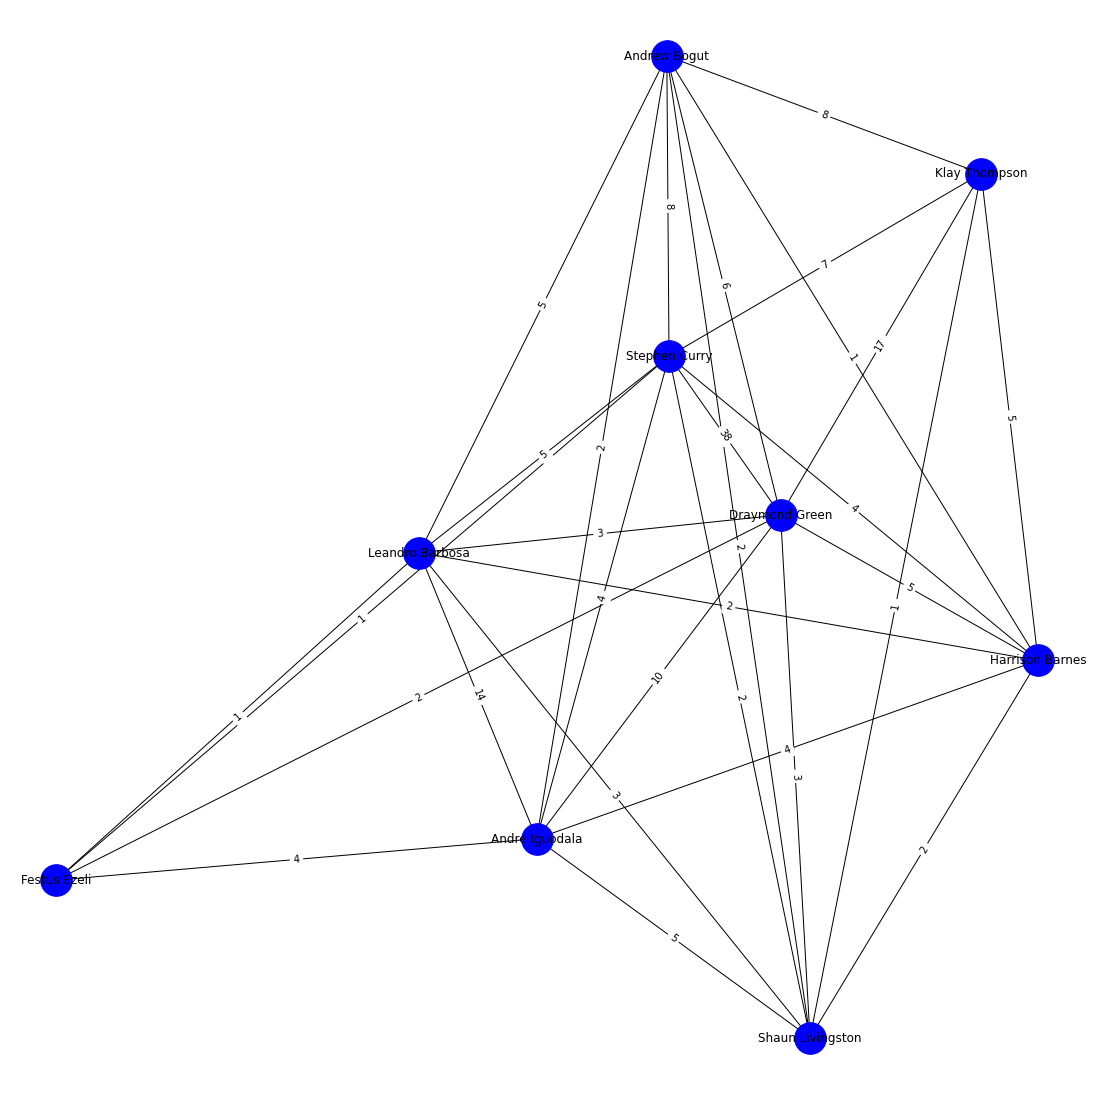

In [139]:
plt.figure(figsize=(15,15))
gsw_graph = nx.Graph()
for i in gsw_player_dic.values():
    gsw_graph.add_node(i)

gsw_backnum_lst = list(gsw_player_dic.keys())

for i in range(gsw_player_num):
    for j in range(gsw_player_num):
            if(gsw_adj[i][j]!=0):
                gsw_graph.add_edge(gsw_player_dic[gsw_backnum_lst[i]], gsw_player_dic[gsw_backnum_lst[j]], weight=gsw_adj[i][j])

pos=nx.spring_layout(gsw_graph)

nx.draw(gsw_graph, pos=pos, with_labels=True)

labels=nx.get_edge_attributes(gsw_graph, 'weight')
nx.draw_networkx_edge_labels(gsw_graph, pos, edge_labels=labels)
nx.draw_networkx_nodes(gsw_graph, pos, nodelist=list(gsw_player_dic.values()), node_color='b', node_size=1000)

# #2. Calculate CI(Connectivity Index)

In [150]:
#calculate connectivity index : BPM(Box Plus/Minus)

import itertools

hou_node_weights = {13 : 26.5, 12 : 5.8, 1 : -4.7, 31 : 1.2, 5 : -13.1, 6 : 0.5, 33 : -14.6, 15 : -2.6, 9 : -7.3, 3 : -20.5}
gsw_node_weights = {23 : -0.6, 30 : 7.7, 11 : -11.0, 12 : 6.6, 40 : 5.3, 9 : 9.4, 19 : -1.4, 34 : 7.1, 31 : -5.6}

#hou_node_weights = {13 : 26.5, 12 : 5.8, 1 : 0, 31 : 1.2, 5 : 0, 6 : 0.5, 33 : 0, 15 : 0, 9 : 0, 3 : 0}
#gsw_node_weights = {23 : 0, 30 : 7.7, 11 : 0, 12 : 6.6, 40 : 5.3, 9 : 9.4, 19 : 0, 34 : 7.1, 31 : 0}

hou_ci = 0

for i in itertools.combinations(range(0, hou_player_num), 2):
    pl1 = list(hou_player_dic.values())[i[0]]
    pl2 = list(hou_player_dic.values())[i[1]]
    
    strength_lst = []
        weight_lst=[]
        for j in path:
            weight_lst.append(hou_graph[j[0]][j[1]]["weight"])
        strength_lst.append(min(weight_lst))
    
    conn = max(strength_lst)
    
    hou_ci += conn * hou_node_weights[hou_backnum_lst[i[0]]] * hou_node_weights[hou_backnum_lst[i[1]]]
    
print(hou_ci)

gsw_ci = 0

for i in itertools.combinations(range(0, gsw_player_num), 2):
    pl1 = list(gsw_player_dic.values())[i[0]]
    pl2 = list(gsw_player_dic.values())[i[1]]
    
    strength_lst = []
    for path in nx.all_simple_edge_paths(gsw_graph, pl1, pl2):
        weight_lst=[]
        for j in path:
            weight_lst.append(gsw_graph[j[0]][j[1]]["weight"])
        strength_lst.append(min(weight_lst))
    
    conn = max(strength_lst)
    
    gsw_ci += conn * gsw_node_weights[gsw_backnum_lst[i[0]]] * gsw_node_weights[gsw_backnum_lst[i[1]]]

print(gsw_ci)

-4872.429999999997
-1448.91
